In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [3]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
Y = pd.DataFrame(breast_cancer.target, columns=['target'])

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
import statsmodels.api as sm

In [11]:
X = sm.add_constant(X, has_constant='add')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(398, 31) (171, 31) (398, 1) (171, 1)


In [14]:
import sklearn.preprocessing as preprocessing

In [15]:
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
from sklearn import neighbors

KNN method

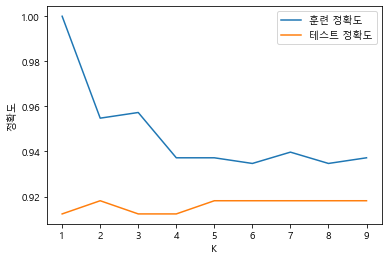

In [17]:
training_accuracy = []
test_accuracy = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 10)

for k in k_settings:
    # 모델 생성
    ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    ploan_knn.fit(X_train, Y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(ploan_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_accuracy.append(ploan_knn.score(X_test, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_accuracy, label="훈련 정확도")
plt.plot(k_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("K")
plt.legend()

In [18]:
from itertools import compress
best_k_temp = test_accuracy==max(test_accuracy)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k)

최적의 K값: 2


In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [23]:
best_ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_ploan_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
Y_predict = best_ploan_knn.predict(X_test)

In [26]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

In [27]:
result_mat = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'], index =['KNN_best'])
result_mat.loc['KNN_best']=[accuracy, precision, recall, f1]
result_mat

,accuracy,precision,recall,f1
KNN_best,0.918129,0.951456,0.915888,0.933333


Logistic Regression method

In [37]:
logit_m = sm.Logit(Y_train, X_train)
logit_m_train = logit_m.fit(method='powell')

C:\Users\juhyj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
logit_m_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  398
Model:                          Logit   Df Residuals:                      367
Method:                           MLE   Df Model:                           30
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                  0.9307
Time:                        05:00:42   Log-Likelihood:                -18.209
converged:                      False   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 2.280e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1171.7243   5.87e+04      0.020      0.984   -1.14e+05    1.16e+05
x2           678.9187   2.14e+04      0.032      0.975   -4.12e+04    4.25e+04
x3           256.1596    474.383      0.540      0.589    -673.615    1185.934
x4           181.6017   3273.378      0.055      0.956   -6234.101    6597.305
x5             8.5256     86.944      0.098      0.922    -161.881     178.932
x6         -9.246e+04   1.95e+05     -0.473      0.636   -4.75e+05     2.9e+05
x7           7.05e+04   1.44e+05      0.491      0.623   -2.11e+05    3.52e+05
x8         -7.059e+04   1.08e+05     -0.655      0.512   -2.82e+05    1.41e+05
x9         -1.006e+05   1.76e+05     -0.572      0.567   -4.45e+05    2.44e+05
x10             1e+04   6.66e+04      0.150      0.881    -1.2e+05     1.4e+05
x11        -3559.4555   4.94e+05     -0.007      0.994   -9.72e+05    9.64e+05
x12         3.173e+04   8.88e+04      0.357      0.721   -1.42e+05    2.06e+05
x13         2729.6211   3313.720      0.824      0.410   -3765.150    9224.392
x14         -643.6940   5677.356     -0.113      0.910   -1.18e+04    1.05e+04
x15         -654.0546    773.759     -0.845      0.398   -2170.595     862.486
x16        -2.586e+05   6.84e+05     -0.378      0.706    -1.6e+06    1.08e+06
x17         1.174e+05   2.91e+05      0.403      0.687   -4.54e+05    6.88e+05
x18          4.33e+04   1.57e+05      0.277      0.782   -2.63e+05     3.5e+05
x19         2.273e+05   9.31e+05      0.244      0.807    -1.6e+06    2.05e+06
x20         1.878e+05   3.85e+05      0.488      0.626   -5.67e+05    9.42e+05
x21        -4.105e+05   1.36e+06     -0.301      0.763   -3.08e+06    2.26e+06
x22         -226.7667   8527.436     -0.027      0.979   -1.69e+04    1.65e+04
x23         -693.7022    460.203     -1.507      0.132   -1595.684     208.279
x24          194.1456    809.177      0.240      0.810   -1391.812    1780.103
x25          -24.6282     82.141     -0.300      0.764    -185.622     136.366
x26         3.981e+04   1.09e+05      0.367      0.714   -1.73e+05    2.53e+05
x27        -1.982e+04   5.39e+04     -0.368      0.713   -1.25e+05    8.58e+04
x28         -690.8251    2.1e+04     -0.033      0.974   -4.19e+04    4.06e+04
x29        -7.298e+04   1.09e+05     -0.670      0.503   -2.86e+05    1.41e+05
x30        -9840.4890   5.46e+04     -0.180      0.857   -1.17e+05    9.72e+04
x31         6.429e+04    2.3e+05      0.279      0.780   -3.87e+05    5.16e+05
==============================================================================

Possibly complete quasi-separation: A fraction 0.73 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
Y_predict_lg = logit_m_train.predict(X_test)
print(Y_predict_lg)

[1.00000000e+00 1.00000000e+00 9.81867717e-01 3.55245748e-09
 9.81118111e-01 1.00000000e+00 9.86323150e-01 2.41432892e-01
 9.99961948e-01 9.99311067e-01 1.68408854e-05 9.99894412e-01
 3.44991696e-08 6.70228518e-06 9.55410882e-06 9.99999834e-01
 2.13100987e-13 9.99999493e-01 1.00000000e+00 9.99999971e-01
 2.93879793e-11 2.85136502e-12 4.71385558e-02 1.15982735e-20
 1.05775395e-12 1.48013777e-08 1.00000000e+00 3.95271461e-09
 9.99961315e-01 1.00000000e+00 1.21627563e-03 9.99999943e-01
 3.53999751e-04 3.59689920e-11 2.56644237e-09 9.96584015e-01
 1.00000000e+00 1.00000000e+00 9.99891519e-01 2.43966847e-12
 2.50113849e-07 9.99983329e-01 1.00000000e+00 9.99795376e-01
 1.04988581e-01 9.99999935e-01 1.00000000e+00 1.70006240e-10
 9.99998834e-01 9.94479652e-01 2.08676158e-04 1.00000000e+00
 8.17378883e-02 1.00000000e+00 1.00000000e+00 9.97395921e-01
 1.00000000e+00 1.00000000e+00 9.99999997e-01 3.02711630e-03
 5.88834874e-07 9.99999254e-01 9.99999683e-01 8.38229576e-01
 9.99999823e-01 1.000000

In [46]:
# Y_predict를 threshold를 기준으로 0과 1로 나누어주는 함수 생성
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    Y = Y.astype(int)
    return Y

In [48]:
Y_predict_t = cut_off(Y_predict_lg,0.5)

In [49]:
accuracy = accuracy_score(Y_test, Y_predict_t)
precision = precision_score(Y_test, Y_predict_t)
recall = recall_score(Y_test, Y_predict_t)
f1 = f1_score(Y_test, Y_predict_t)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.971
Precision : 0.981
Recall : 0.972
F1 : 0.977


In [50]:
# 임계값에 따른 비교
def perf_eval(cm):
    # Accuracy
    Accuracy = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1, ))
    # Precision
    Precision = cm[1, 1] /sum(cm[:, 1])
    # Recall
    Recall = cm[1, 1] / sum(cm[1])
    # F1-score
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return ([Accuracy, Precision, Recall, F1])

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
for i in threshold:
    Y_predict_temp = cut_off(Y_predict,i)
    confusion_matrix_temp = confusion_matrix(Y_test, Y_predict_temp)
    table.loc[i] = perf_eval(confusion_matrix_temp)
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance  Accuracy  Precision    Recall        F1
threshold                                           
0.0          0.625731   0.625731  1.000000  0.769784
0.1          0.970760   0.963636  0.990654  0.976959
0.2          0.964912   0.963303  0.981308  0.972222
0.3          0.964912   0.971963  0.971963  0.971963
0.4          0.964912   0.971963  0.971963  0.971963
0.5          0.970760   0.981132  0.971963  0.976526
0.6          0.959064   0.980769  0.953271  0.966825
0.7          0.959064   0.980769  0.953271  0.966825
0.8          0.959064   0.980769  0.953271  0.966825
0.9          0.941520   0.980198  0.925234  0.951923


In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [52]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

Train Accuracy: 0.9798994974874372 
Train AUC: 0.9784864864864866 
Train Confusion Matrix:
[[144   4]
 [  4 246]]
Test Accuracy: 0.9649122807017544 
Test AUC: 0.9656834112149533 
Test Confusion Matrix:
[[ 62   2]
 [  4 103]]


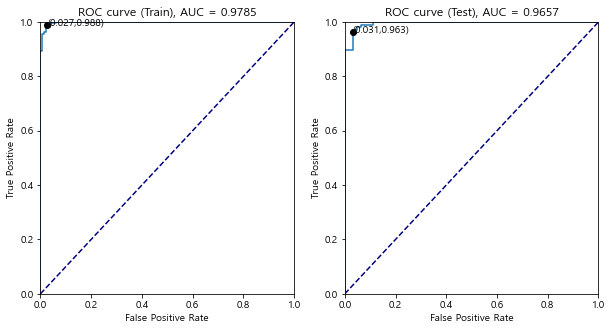

Best Threshold: 0.5487116895941467


In [53]:
best_threshold = plot_ROC(y_train_true=Y_train, y_train_prob=logit_m_train.predict(X_train), 
                          y_test_true=Y_test, y_test_prob=logit_m_train.predict(X_test))
print('Best Threshold:', best_threshold)